In [1]:
# This imports the OpenContextAPI from the api.py file in the
# opencontext directory.
%run '../opencontext/api.py'

In [2]:
import numpy as np
import pandas as pd

oc_api = OpenContextAPI()

# Clear old cached records.
oc_api.clear_api_cache()

# This is a search url for bovid tibias.
url = 'https://opencontext.org/query/?cat=oc-gen-cat-bio-subj-ecofact---oc-gen-cat-animal-bone&prop=obo-foodon-00001303---gbif-1---gbif-44---gbif-359---gbif-731---gbif-9614&prop=oc-zoo-has-anat-id---obo-uberon-0002091---obo-uberon-0000979&type=subjects#tab=0/aq=facet-cidoc-crm-p2-has-type---obo-uberon-0000979/ovgrd=oc/zm=3/lat=38.82/lng=-22.50/ov=sqr'
# Fetch the 'standard' (linked data identified) attributes in use with
# data at the url.
stnd_attribs_tuples = oc_api.get_standard_attributes(
    url,
    # The optional argument below gets popular standard
    # zooarchaeological (bone) measurements.
    add_von_den_driesch_bone_measures=True
)

# Now display the standard attributes found in this search / query result
for slug, label in stnd_attribs_tuples:
    print(f'{label}, identified by slug: {slug}')

Has taxonomic identifier, identified by slug: obo-foodon-00001303
Has anatomical identification, identified by slug: oc-zoo-has-anat-id
Fusion characterization, identified by slug: oc-zoo-fusion-characterization
Has physiological sex determination, identified by slug: oc-zoo-has-phys-sex-det
E54 Dimension, identified by slug: cidoc-crm-e54-dimension
Has type, identified by slug: cidoc-crm-p2-has-type
Consists of, identified by slug: cidoc-crm-p45-consists-of
License, identified by slug: dc-terms-license
Subject, identified by slug: dc-terms-subject
Distance, identified by slug: obo-pato-0000040
Creator, identified by slug: dc-terms-creator
Spatial Coverage, identified by slug: dc-terms-spatial
Contributor, identified by slug: dc-terms-contributor
Coverage, identified by slug: dc-terms-coverage
Temporal Coverage, identified by slug: dc-terms-temporal
References, identified by slug: dc-terms-references
Wikidata, identified by slug: wikidata
Has fusion character, identified by slug: oc-zo

In [3]:
# Make a list of only the slugs from the list of slug, label tuples.
stnd_attribs = [slug for slug, _ in stnd_attribs_tuples]

# Make a dataframe by fetching result records from Open Context.
# This will be slow until we finish improvements to Open Context's API.
# However, the results get cached by saving as files locally. That
# makes iterating on this notebook much less painful.
df = oc_api.url_to_dataframe(url, stnd_attribs)

In [4]:
# Display a sample of the dataframe.
df.head(10)

,uri,citation uri,label,item category,project label,published,updated,latitude,longitude,early bce/ce,...,Dp [oc-zoo-dp],GL,GL [oc-zoo-gl],Ld,Ld [oc-zoo-ld],Ll,Ll [oc-zoo-ll],SD,SD [oc-zoo-sd],Wikidata
0,http://opencontext.org/subjects/0e2852a1-e031-...,https://n2t.net/ark:/28722/k2pv6d865,Bone 18465,Animal Bone,Çatalhöyük Area TP Zooarchaeology,2013-03-02T00:00:00Z,2022-10-25T18:08:02Z,37.668196,32.827191,-7400.0,...,NaN,18.0,18.0,NaN,NaN,NaN,NaN,8.30,8.30,NaN
1,http://opencontext.org/subjects/6f7e02f6-4d28-...,https://n2t.net/ark:/28722/k20002286,Bone 17828,Animal Bone,Çatalhöyük Area TP Zooarchaeology,2013-03-02T00:00:00Z,2022-10-25T18:05:30Z,37.668196,32.827191,-7400.0,...,NaN,11.2,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://opencontext.org/subjects/b2ac0346-f085-...,https://n2t.net/ark:/28722/k2cf9m969,Bone 14996,Animal Bone,Çatalhöyük Area TP Zooarchaeology,2013-03-02T00:00:00Z,2022-10-25T17:55:23Z,37.668196,32.827191,-7400.0,...,NaN,19.4,19.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://opencontext.org/subjects/7e3ab88a-8617-...,https://n2t.net/ark:/28722/k24462t03,2018-84-015,Animal Bone,"The animal bones found in Vatnsvik, lake Þingv...",2019-10-16T03:29:37Z,2022-10-26T05:57:57Z,64.196338,-21.140901,1480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.18,39.18,1.0
4,http://opencontext.org/subjects/c31ba1d0-30db-...,https://n2t.net/ark:/28722/k2rb6z55d,Bone 14941,Animal Bone,Çatalhöyük Area TP Zooarchaeology,2013-03-02T00:00:00Z,2022-10-25T17:55:07Z,37.668196,32.827191,-7400.0,...,NaN,20.2,20.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,http://opencontext.org/subjects/ea5c2aa6-8fb4-...,https://n2t.net/ark:/28722/k2fq9sc74,Bone 5436,Animal Bone,Çatalhöyük Area TP Zooarchaeology,2013-03-02T00:00:00Z,2022-10-25T17:22:42Z,37.668196,32.827191,-7400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.90,13.90,NaN
6,http://opencontext.org/subjects/bafe723a-351c-...,https://n2t.net/ark:/28722/k2z894m25,Bone 9811,Animal Bone,Çatalhöyük Area TP Zooarchaeology,2013-03-02T00:00:00Z,2022-10-25T17:37:42Z,37.668196,32.827191,-7400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.30,9.30,NaN
7,http://opencontext.org/subjects/40b59746-c8c8-...,https://n2t.net/ark:/28722/k25x27f7b,Bone 18464,Animal Bone,Çatalhöyük Area TP Zooarchaeology,2013-03-02T00:00:00Z,2022-10-25T18:08:01Z,37.668196,32.827191,-7400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,http://opencontext.org/subjects/5b16bd6a-f9af-...,https://n2t.net/ark:/28722/k2mw2bj1q,Bone 14997,Animal Bone,Çatalhöyük Area TP Zooarchaeology,2013-03-02T00:00:00Z,2022-10-25T17:55:23Z,37.668196,32.827191,-7400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,http://opencontext.org/subjects/02b42b27-924e-...,https://n2t.net/ark:/28722/k23f4nw9d,Bone 2562,Animal Bone,Çatalhöyük Area TP Zooarchaeology,2013-03-02T00:00:00Z,2022-10-25T17:12:40Z,37.668196,32.827191,-7400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.40,14.40,NaN


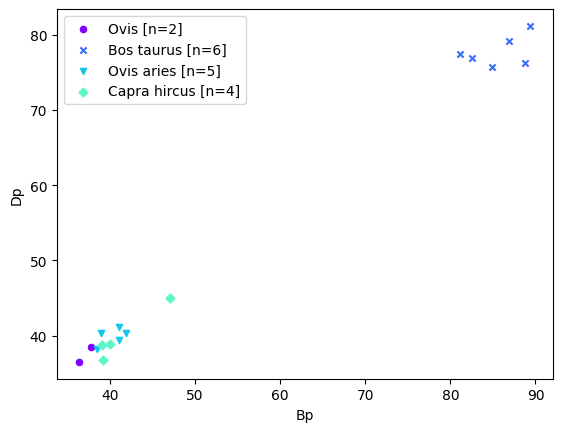

In [5]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Now we're going to make a plot.
markers = [
    'o',
    'x',
    'v',
    'D',
    'p',
    '^',
    's',
    '*',
]
colors = cm.rainbow(np.linspace(0, 1, len(markers)))
taxa = df['Has taxonomic identifier'].unique().tolist()
ax = None
i = 0
for taxon in df['Has taxonomic identifier'].unique().tolist():
    taxon_index = (
        (df['Has taxonomic identifier'] == taxon)
        & ~df['Bp'].isnull()
        & ~df['Dp'].isnull()
    )
    if df[taxon_index].empty:
        # No data for this taxon
        continue
    label = '{} [n={}]'.format(taxon, len(df[taxon_index].index))
    if not ax:
        ax = df[taxon_index].plot.scatter(
            x='Bp', 
            y='Dp', 
            marker=markers[i], 
            label=label, 
            color=colors[i].reshape(1,-1)
        )
    else:
        df[taxon_index].plot.scatter(
            x='Bp', 
            y='Dp', 
            marker=markers[i], 
            label=label, 
            ax=ax, 
            color=colors[i].reshape(1,-1)
        )
    i += 1
    if i >= len(markers):
        # This is here to make sure we don't run out of markers.
        markers += [(m + m) for m in markers]
        colors = cm.rainbow(np.linspace(0, 1, len(markers)))





In [6]:
import os

# Now save the results of all of this as a CSV file.
repo_path = os.path.dirname(os.path.abspath(os.getcwd()))
csv_path = os.path.join(
    repo_path, 
    'files',
    'oc-api-demo-results.csv'
)
df.to_csv(csv_path, index=False)
print('Saved this example as a CSV table at: {}'.format(csv_path))


Saved this example as a CSV table at: /home/ekansa/github/open-context-jupyter/files/oc-api-demo-results.csv
